In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [89]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

## Perform API Calls

In [136]:
import openweathermapy.core as owm
from pprint import pprint
from urllib.error import HTTPError

# OpenWeatherMap API Key
api_key = api_keys.api_key

# Create settings dictionary with information we're interested in
settings = {"units": "imperial", "appid": api_key}

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

weather_data = []
city_idx = []

total_cities = len(cities)
sets = int(total_cities / 50) + int((total_cities % 50) > 0)
#print("{} {} {}".format(total_cities, sets, ((total_cities % 50) > 0)))
curr_cnt = 0

# Get current weather
for i, city in enumerate(cities):
    #print(f'{city}')
    try:
        current_weather = owm.get_current(city, **settings)
#        current_weather = city
    except HTTPError:
        print(f"No weather found for city {i} {city}")
    else:
#        pprint(f"Current weather object for Paris: {current_weather}.")
        print(f"Processing Record {curr_cnt % 50} of Set {int(curr_cnt / 50)} | {city}")
        curr_cnt += 1
        weather_data.append(current_weather)
        #pprint(weather_data)
#     if (i >= 20):
#         break

# summary = ['coord']
# data = [response(*summary) for response in weather_data]
summary = ['id', 'name', "clouds.all", 'sys.country', 'dt', "main.humidity",
           'coord.lat', 'coord.lon', "main.temp_max", 'wind.speed']
data = [response(*summary) for response in weather_data]
#print(len(weather_data))
#print(weather_data)
# print(len(data))
# print(data)

weather_data_df = pd.DataFrame(data, columns=['City ID', 'City Name', 'Cloudiness(%)',
                                              'Country', 'Date', 'Humidity(%)', 'Lat', 'Long',
                                              'MaxTemp(in F)', 'Wind Speed(mph)'])
weather_data_df
#weather_data_df.count()

Processing Record 0 of Set 0 | ribeira grande
Processing Record 1 of Set 0 | rikitea
Processing Record 2 of Set 0 | santa flavia
Processing Record 3 of Set 0 | castro
Processing Record 4 of Set 0 | pontes e lacerda
No weather found for city 5 belushya guba
Processing Record 0 of Set 1 | mataura
Processing Record 1 of Set 1 | pringsewu
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | praia
Processing Record 4 of Set 1 | broome
Processing Record 0 of Set 2 | chase
Processing Record 1 of Set 2 | barrow
No weather found for city 13 sembe
Processing Record 2 of Set 2 | quang ngai
Processing Record 3 of Set 2 | albany
Processing Record 4 of Set 2 | busselton
No weather found for city 17 taolanaro
Processing Record 0 of Set 3 | sungaipenuh
Processing Record 1 of Set 3 | arraial do cabo
Processing Record 2 of Set 3 | senanga
Processing Record 3 of Set 3 | ushuaia
Processing Record 4 of Set 3 | georgetown
Processing Record 0 of Set 4 | cape town
Processing Record 1 of Set 4 |

Processing Record 4 of Set 35 | taoudenni
Processing Record 0 of Set 36 | svetlaya
Processing Record 1 of Set 36 | san cristobal
Processing Record 2 of Set 36 | fort nelson
Processing Record 3 of Set 36 | caravelas
No weather found for city 205 amderma
Processing Record 4 of Set 36 | rosetta
No weather found for city 207 bengkulu
Processing Record 0 of Set 37 | longyearbyen
Processing Record 1 of Set 37 | gladstone
Processing Record 2 of Set 37 | bonanza
No weather found for city 211 hvammstangi
Processing Record 3 of Set 37 | vila velha
Processing Record 4 of Set 37 | pangnirtung
Processing Record 0 of Set 38 | ko samui
Processing Record 1 of Set 38 | richards bay
Processing Record 2 of Set 38 | belyy yar
No weather found for city 217 marang
Processing Record 3 of Set 38 | bathsheba
Processing Record 4 of Set 38 | chokurdakh
Processing Record 0 of Set 39 | finschhafen
Processing Record 1 of Set 39 | sakaiminato
Processing Record 2 of Set 39 | porto empedocle
Processing Record 3 of Set

Processing Record 4 of Set 70 | pandan niog
Processing Record 0 of Set 71 | new glasgow
Processing Record 1 of Set 71 | kalaleh
No weather found for city 402 beruni
Processing Record 2 of Set 71 | ust-nera
Processing Record 3 of Set 71 | brownsville
Processing Record 4 of Set 71 | oropesa
Processing Record 0 of Set 72 | alofi
Processing Record 1 of Set 72 | poum
Processing Record 2 of Set 72 | campbellsville
Processing Record 3 of Set 72 | dandong
Processing Record 4 of Set 72 | synya
Processing Record 0 of Set 73 | atambua
Processing Record 1 of Set 73 | darnah
No weather found for city 413 ngukurr
Processing Record 2 of Set 73 | maniitsoq
Processing Record 3 of Set 73 | mandera
No weather found for city 416 kazalinsk
Processing Record 4 of Set 73 | aksarka
Processing Record 0 of Set 74 | paamiut
Processing Record 1 of Set 74 | sindor
Processing Record 2 of Set 74 | monrovia
Processing Record 3 of Set 74 | aiquile
Processing Record 4 of Set 74 | la orilla
Processing Record 0 of Set 75

Processing Record 3 of Set 106 | cortland
Processing Record 4 of Set 106 | wasilla
Processing Record 0 of Set 107 | adre
Processing Record 1 of Set 107 | saint-georges
No weather found for city 602 kerki
Processing Record 2 of Set 107 | yar-sale
Processing Record 3 of Set 107 | cabedelo
No weather found for city 605 grimari
Processing Record 4 of Set 107 | qeshm
Processing Record 0 of Set 108 | kumluca
Processing Record 1 of Set 108 | cap malheureux
Processing Record 2 of Set 108 | ovalle
Processing Record 3 of Set 108 | torbeyevo
Processing Record 4 of Set 108 | cognac
Processing Record 0 of Set 109 | khovu-aksy


,City ID,City Name,Cloudiness(%),Country,Date,Humidity(%),Lat,Long,MaxTemp(in F),Wind Speed(mph)
0,3372707,Ribeira Grande,40,PT,1533310200,74,38.52,-28.70,78.80,10.29
1,4030556,Rikitea,80,PF,1533312168,100,-23.12,-134.97,74.13,6.62
2,3832376,Santa Flavia,90,CL,1533308400,100,-51.55,-72.35,30.20,14.99
3,3896218,Castro,92,CL,1533312169,88,-42.48,-73.76,46.77,8.75
4,3453060,Pontes e Lacerda,0,BR,1533312170,79,-15.23,-59.33,82.50,4.61
5,6201424,Mataura,0,NZ,1533312170,99,-46.19,168.86,33.90,5.17
6,1630639,Pringsewu,8,ID,1533312171,70,-5.36,104.98,75.03,3.60
7,2175403,Bluff,0,AU,1533312171,91,-23.58,149.07,58.56,9.42
8,3460954,Praia,75,BR,1533308400,57,-20.25,-43.81,75.20,10.29
9,2656067,Broome,75,GB,1533309600,54,52.47,1.45,87.80,9.17


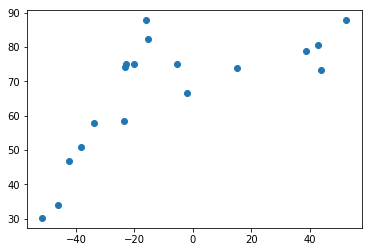

In [134]:
plt.scatter(weather_data_df['Lat'], weather_data_df['MaxTemp(in F)'])

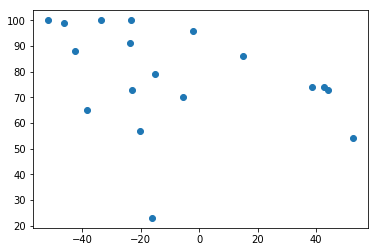

In [135]:
plt.scatter(weather_data_df['Lat'], weather_data_df['Humidity(%)'])

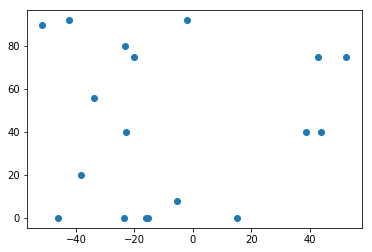

In [131]:
plt.scatter(weather_data_df['Lat'], weather_data_df['Cloudiness(%)'])

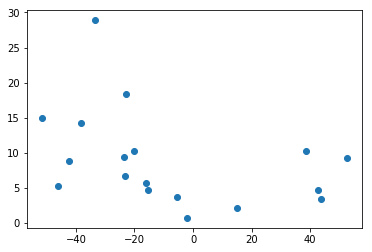

In [132]:
plt.scatter(weather_data_df['Lat'], weather_data_df['Wind Speed(mph)'])

In [4]:
def google_api_request(url, params):
    params['key'] = gkey
    result = requests.get(url, params=params).json()
    if 'error_message' in result:
        raise Exception(result['error_message'])
    return result

def geocode_request(address):
    return google_api_request(
        "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=", {'address': address}
    )

def places_request(lat, lng, radius=8000, keyword=None, place_type=None, rankby=None):
    params = {
        "location": f"{lat},{lng}",
        "radius": radius,
    }
    if keyword:
        params['keyword'] = keyword
    if place_type:
        params['type'] = place_type
    if rankby:
        params['rankby'] = rankby
        del params['radius']
    return google_api_request(
        "https://maps.googleapis.com/maps/api/place/nearbysearch/json", params
    )

### "What's the weather like as we approach the equator?"

In [115]:
import json
#a = [1,2,3]
#print(current_weather)
a = []
for i, city in enumerate(cities):
    try:
        current_weather = owm.get_current(city, **settings)
    except HTTPError:
        print(f"No weather found for city {i} {city}")
    else:
        a.append(current_weather)
    if(i>2):
        break

print(len(a))
with open('test.txt', 'w') as f:
    f.write(json.dumps(a))

#Now read the file back into a Python list object
with open('test.txt', 'r') as f:
    a = json.loads(f.read())
pprint(a)
summary = ['id', 'name', "clouds.all", 'sys.country', 'dt', "main.humidity",
           'coord.lat', 'coord.lon', "main.temp", 'wind.speed']
data = a[0](*summary)
#data = [response(*summary) for response in a]
data

4
[{'base': 'stations',
  'clouds': {'all': 75},
  'cod': 200,
  'coord': {'lat': 38.52, 'lon': -28.7},
  'dt': 1533308400,
  'id': 3372707,
  'main': {'humidity': 65,
           'pressure': 1022,
           'temp': 78.8,
           'temp_max': 78.8,
           'temp_min': 78.8},
  'name': 'Ribeira Grande',
  'sys': {'country': 'PT',
          'id': 5950,
          'message': 0.0375,
          'sunrise': 1533279530,
          'sunset': 1533330147,
          'type': 1},
  'visibility': 10000,
  'weather': [{'description': 'broken clouds',
               'icon': '04d',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 140, 'speed': 14.99}},
 {'base': 'stations',
  'clouds': {'all': 80},
  'cod': 200,
  'coord': {'lat': -23.12, 'lon': -134.97},
  'dt': 1533310241,
  'id': 4030556,
  'main': {'grnd_level': 1030.72,
           'humidity': 100,
           'pressure': 1030.72,
           'sea_level': 1030.7,
           'temp': 74.13,
           'temp_max': 74.13,


TypeError: 'dict' object is not callable

In [68]:
pprint(a)

[{'base': 'stations',
  'clouds': {'all': 40},
  'cod': 200,
  'coord': {'lat': 18.39, 'lon': 42.45},
  'dt': 1533272400,
  'id': 110690,
  'main': {'humidity': 69,
           'pressure': 1023,
           'temp': 73.4,
           'temp_max': 73.4,
           'temp_min': 73.4},
  'name': 'Faya',
  'sys': {'country': 'SA',
          'id': 6975,
          'message': 0.0038,
          'sunrise': 1533264520,
          'sunset': 1533311032,
          'type': 1},
  'visibility': 10000,
  'weather': [{'description': 'scattered clouds',
               'icon': '03d',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 180, 'speed': 11.41}},
 {'base': 'stations',
  'clouds': {'all': 40},
  'cod': 200,
  'coord': {'lat': -53.16, 'lon': -70.91},
  'dt': 1533272400,
  'id': 3874787,
  'main': {'humidity': 91,
           'pressure': 977,
           'temp': 37.4,
           'temp_max': 37.4,
           'temp_min': 37.4},
  'name': 'Punta Arenas',
  'sys': {'country': 'CL',
 

  'sys': {'country': 'PF',
          'message': 0.0036,
          'sunrise': 1533314235,
          'sunset': 1533354352},
  'weather': [{'description': 'moderate rain',
               'icon': '10n',
               'id': 501,
               'main': 'Rain'}],
  'wind': {'deg': 133.006, 'speed': 18.81}},
 {'base': 'stations',
  'clouds': {'all': 36},
  'cod': 200,
  'coord': {'lat': 6.12, 'lon': 81.12},
  'dt': 1533276069,
  'id': 1244926,
  'main': {'grnd_level': 1021.85,
           'humidity': 92,
           'pressure': 1021.85,
           'sea_level': 1024.47,
           'temp': 82.73,
           'temp_max': 82.73,
           'temp_min': 82.73},
  'name': 'Hambantota',
  'sys': {'country': 'LK',
          'message': 0.0213,
          'sunrise': 1533256228,
          'sunset': 1533300773},
  'weather': [{'description': 'scattered clouds',
               'icon': '03d',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 247.006, 'speed': 15.46}},
 {'base': 'sta

  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 140, 'speed': 14.99}},
 {'base': 'stations',
  'clouds': {'all': 76},
  'cod': 200,
  'coord': {'lat': -16.52, 'lon': -151.75},
  'dt': 1533276075,
  'id': 4033077,
  'main': {'grnd_level': 1026.96,
           'humidity': 100,
           'pressure': 1026.96,
           'sea_level': 1027.67,
           'temp': 78.5,
           'temp_max': 78.5,
           'temp_min': 78.5},
  'name': 'Vaitape',
  'rain': {'3h': 0.345},
  'sys': {'country': 'PF',
          'message': 0.005,
          'sunrise': 1533313844,
          'sunset': 1533354942},
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 48.5058, 'speed': 5.84}},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': 44.83, 'lon': -0.61},
  'dt

           'temp_min': 47.81},
  'name': 'Kaitangata',
  'sys': {'country': 'NZ',
          'message': 0.0038,
          'sunrise': 1533239923,
          'sunset': 1533274524},
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 77.5058, 'speed': 8.86}},
 {'base': 'stations',
  'clouds': {'all': 76},
  'cod': 200,
  'coord': {'lat': -33.21, 'lon': 138.6},
  'dt': 1533275998,
  'id': 2069194,
  'main': {'grnd_level': 964.87,
           'humidity': 93,
           'pressure': 964.87,
           'sea_level': 1024.22,
           'temp': 48.62,
           'temp_max': 48.62,
           'temp_min': 48.62},
  'name': 'Jamestown',
  'rain': {'3h': 0.135},
  'sys': {'country': 'AU',
          'message': 0.0032,
          'sunrise': 1533245717,
          'sunset': 1533283719},
  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'ma

           'temp': 50.33,
           'temp_max': 50.33,
           'temp_min': 50.33},
  'name': 'Chuy',
  'sys': {'country': 'UY',
          'message': 0.0031,
          'sunrise': 1533291836,
          'sunset': 1533329784},
  'weather': [{'description': 'few clouds',
               'icon': '02n',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 110.506, 'speed': 12.33}},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': -9.8, 'lon': -139.03},
  'dt': 1533276088,
  'id': 4020109,
  'main': {'grnd_level': 1027.04,
           'humidity': 100,
           'pressure': 1027.04,
           'sea_level': 1027.14,
           'temp': 79.22,
           'temp_max': 79.22,
           'temp_min': 79.22},
  'name': 'Atuona',
  'sys': {'country': 'PF',
          'message': 0.0162,
          'sunrise': 1533310266,
          'sunset': 1533352411},
  'weather': [{'description': 'clear sky',
               'icon': '01n',
               'id': 800,

          'sunrise': 1533274758,
          'sunset': 1533325650,
          'type': 1},
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 280, 'speed': 3.36}},
 {'base': 'stations',
  'clouds': {'all': 75},
  'cod': 200,
  'coord': {'lat': 62.58, 'lon': 6.12},
  'dt': 1533273600,
  'id': 3141667,
  'main': {'humidity': 93,
           'pressure': 1018,
           'temp': 61.45,
           'temp_max': 62.6,
           'temp_min': 60.8},
  'name': 'Roald',
  'sys': {'country': 'NO',
          'id': 5271,
          'message': 0.005,
          'sunrise': 1533265359,
          'sunset': 1533327518,
          'type': 1},
  'visibility': 10000,
  'weather': [{'description': 'light intensity shower rain',
               'icon': '09d',
               'id': 520,
               'main': 'Rain'}],
  'wind': {'deg': 260, 'speed': 10.29}},
 {'base': 'stations',
  'clouds': {'all':

  'weather': [{'description': 'scattered clouds',
               'icon': '03d',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 100, 'gust': 13, 'speed': 22.37}},
 {'base': 'stations',
  'clouds': {'all': 20},
  'cod': 200,
  'coord': {'lat': -7.95, 'lon': 31.62},
  'dt': 1533272400,
  'id': 149703,
  'main': {'humidity': 82,
           'pressure': 1022,
           'temp': 55.4,
           'temp_max': 55.4,
           'temp_min': 55.4},
  'name': 'Sumbawanga',
  'sys': {'country': 'TZ',
          'id': 6499,
          'message': 0.0046,
          'sunrise': 1533269175,
          'sunset': 1533311593,
          'type': 1},
  'visibility': 10000,
  'weather': [{'description': 'few clouds',
               'icon': '02d',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 90, 'speed': 3.36}},
 {'base': 'stations',
  'clouds': {'all': 44},
  'cod': 200,
  'coord': {'lat': -20.63, 'lon': -46},
  'dt': 1533276100,
  'id': 3453439,
  'm

          'sunrise': 1533272883,
          'sunset': 1533314675},
  'weather': [{'description': 'clear sky',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 253.006, 'speed': 1.92}},
 {'base': 'stations',
  'clouds': {'all': 75},
  'cod': 200,
  'coord': {'lat': 45.52, 'lon': -122.67},
  'dt': 1533272160,
  'id': 5746545,
  'main': {'humidity': 68,
           'pressure': 1018,
           'temp': 65.05,
           'temp_max': 68,
           'temp_min': 60.8},
  'name': 'Portland',
  'sys': {'country': 'US',
          'id': 2274,
          'message': 0.0038,
          'sunrise': 1533301039,
          'sunset': 1533353733,
          'type': 1},
  'visibility': 16093,
  'weather': [{'description': 'broken clouds',
               'icon': '04n',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 340, 'speed': 5.82}},
 {'base': 'stations',
  'clouds': {'all': 92},
  'cod': 200,
  'coord': {'lat': -37.8, 'l

          'sunset': 1533318055,
          'type': 1},
  'visibility': 10000,
  'weather': [{'description': 'broken clouds',
               'icon': '04d',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 290, 'speed': 3.36}},
 {'base': 'stations',
  'clouds': {'all': 75},
  'cod': 200,
  'coord': {'lat': -18.65, 'lon': -173.98},
  'dt': 1533272400,
  'id': 4032420,
  'main': {'humidity': 64,
           'pressure': 1011,
           'temp': 73.4,
           'temp_max': 73.4,
           'temp_min': 73.4},
  'name': 'Neiafu',
  'sys': {'country': 'TO',
          'id': 8332,
          'message': 0.0628,
          'sunrise': 1533319351,
          'sunset': 1533360106,
          'type': 1},
  'visibility': 10000,
  'weather': [{'description': 'broken clouds',
               'icon': '04n',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'speed': 2.24}},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': -38.31, 'l

               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 174.006, 'speed': 13.22}},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': 41.42, 'lon': -6.55},
  'dt': 1533276119,
  'id': 2737599,
  'main': {'grnd_level': 959.28,
           'humidity': 76,
           'pressure': 959.28,
           'sea_level': 1032.09,
           'temp': 63.2,
           'temp_max': 63.2,
           'temp_min': 63.2},
  'name': 'Saldanha',
  'sys': {'country': 'PT',
          'message': 0.0031,
          'sunrise': 1533273790,
          'sunset': 1533325256},
  'weather': [{'description': 'clear sky',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 14.5058, 'speed': 2.59}},
 {'base': 'stations',
  'clouds': {'all': 8},
  'cod': 200,
  'coord': {'lat': 50.72, 'lon': 136.64},
  'dt': 1533276120,
  'id': 2016307,
  'main': {'grnd_level': 1004.35,
           'humidity': 56,
           'pressure': 1004.

          'sunset': 1533275207},
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 235.006, 'speed': 7.52}},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': 52.47, 'lon': 1.45},
  'dt': 1533275760,
  'id': 2656067,
  'main': {'humidity': 82,
           'pressure': 1023,
           'temp': 66.2,
           'temp_max': 66.2,
           'temp_min': 66.2},
  'name': 'Broome',
  'sys': {'country': 'GB',
          'id': 5141,
          'message': 0.0041,
          'sunrise': 1533269846,
          'sunset': 1533325334,
          'type': 1},
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'speed': 2.24}},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': 69.7, 'lon': 170.27},
  'dt': 1533276646,
  'id': 2122090,

          'sunrise': 1533293322,
          'sunset': 1533331274},
  'weather': [{'description': 'broken clouds',
               'icon': '04n',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 102.006, 'speed': 9.19}},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': -6.44, 'lon': -36.64},
  'dt': 1533276655,
  'id': 3390864,
  'main': {'grnd_level': 970.95,
           'humidity': 88,
           'pressure': 970.95,
           'sea_level': 1027.79,
           'temp': 64.01,
           'temp_max': 64.01,
           'temp_min': 64.01},
  'name': 'Acari',
  'sys': {'country': 'BR',
          'message': 0.0034,
          'sunrise': 1533285440,
          'sunset': 1533328090},
  'weather': [{'description': 'clear sky',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 134.506, 'speed': 11.54}},
 {'base': 'stations',
  'clouds': {'all': 90},
  'cod': 200,
  'coord': {'lat': 16.

          'type': 1},
  'visibility': 8047,
  'weather': [{'description': 'haze',
               'icon': '50n',
               'id': 721,
               'main': 'Haze'}],
  'wind': {'deg': 285.006, 'speed': 4.16}},
 {'base': 'stations',
  'clouds': {'all': 56},
  'cod': 200,
  'coord': {'lat': 11.67, 'lon': 92.75},
  'dt': 1533276661,
  'id': 1259385,
  'main': {'grnd_level': 1021.37,
           'humidity': 92,
           'pressure': 1021.37,
           'sea_level': 1021.63,
           'temp': 84.89,
           'temp_max': 84.89,
           'temp_min': 84.89},
  'name': 'Port Blair',
  'sys': {'country': 'IN',
          'message': 0.0032,
          'sunrise': 1533253002,
          'sunset': 1533298413},
  'weather': [{'description': 'broken clouds',
               'icon': '04d',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 237.006, 'speed': 20.94}},
 {'base': 'stations',
  'clouds': {'all': 90},
  'cod': 200,
  'coord': {'lat': 58.3, 'lon': -134.42},
 

          'sunset': 1533310433},
  'weather': [{'description': 'clear sky',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 6.0058, 'speed': 2.04}},
 {'base': 'stations',
  'clouds': {'all': 32},
  'cod': 200,
  'coord': {'lat': 14.73, 'lon': 0.92},
  'dt': 1533276666,
  'id': 2447416,
  'main': {'grnd_level': 988.54,
           'humidity': 74,
           'pressure': 988.54,
           'sea_level': 1022.72,
           'temp': 77.87,
           'temp_max': 77.87,
           'temp_min': 77.87},
  'name': 'Ayorou',
  'sys': {'country': 'NE',
          'message': 0.0035,
          'sunrise': 1533274796,
          'sunset': 1533320693},
  'weather': [{'description': 'scattered clouds',
               'icon': '03d',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 191.506, 'speed': 8.3}},
 {'base': 'stations',
  'clouds': {'all': 75},
  'cod': 200,
  'coord': {'lat': 33.08, 'lon': -16.33},
  'dt': 15332

  'weather': [{'description': 'clear sky',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 307.006, 'speed': 6.06}},
 {'base': 'stations',
  'clouds': {'all': 92},
  'cod': 200,
  'coord': {'lat': 63.86, 'lon': 57.31},
  'dt': 1533276679,
  'id': 470905,
  'main': {'grnd_level': 987.81,
           'humidity': 99,
           'pressure': 987.81,
           'sea_level': 1012.07,
           'temp': 47.81,
           'temp_max': 47.81,
           'temp_min': 47.81},
  'name': 'Vuktyl',
  'rain': {'3h': 4.1125},
  'sys': {'country': 'RU',
          'message': 0.0032,
          'sunrise': 1533252387,
          'sunset': 1533315905},
  'weather': [{'description': 'moderate rain',
               'icon': '10d',
               'id': 501,
               'main': 'Rain'}],
  'wind': {'deg': 0.00579834, 'speed': 12.66}},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': 36.54, 'lon': -4.62},
  'dt': 1533276000,
 

  'wind': {'deg': 279.506, 'speed': 4.72}},
 {'base': 'stations',
  'clouds': {'all': 90},
  'cod': 200,
  'coord': {'lat': 70.47, 'lon': -68.59},
  'dt': 1533274140,
  'id': 5924351,
  'main': {'humidity': 100,
           'pressure': 995,
           'temp': 35.6,
           'temp_max': 35.6,
           'temp_min': 35.6},
  'name': 'Clyde River',
  'sys': {'country': 'CA',
          'id': 3585,
          'message': 0.0037,
          'sunrise': 1533276378,
          'sunset': 1533352030,
          'type': 1},
  'visibility': 3219,
  'weather': [{'description': 'mist',
               'icon': '50n',
               'id': 701,
               'main': 'Mist'}],
  'wind': {'deg': 340, 'speed': 13.87}},
 {'base': 'stations',
  'clouds': {'all': 40},
  'cod': 200,
  'coord': {'lat': 20.44, 'lon': 99.89},
  'dt': 1533272400,
  'id': 1152194,
  'main': {'humidity': 74,
           'pressure': 1005,
           'temp': 86,
           'temp_max': 86,
           'temp_min': 86},
  'name': 'Mae Sai',
  

 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': 42.77, 'lon': -9.06},
  'dt': 1533276000,
  'id': 3115824,
  'main': {'humidity': 100,
           'pressure': 1018,
           'temp': 69.8,
           'temp_max': 69.8,
           'temp_min': 69.8},
  'name': 'Muros',
  'sys': {'country': 'ES',
          'id': 5500,
          'message': 0.0031,
          'sunrise': 1533274192,
          'sunset': 1533326056,
          'type': 1},
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 24.5058, 'speed': 3.71}},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': 42.46, 'lon': 59.61},
  'dt': 1533274200,
  'id': 601294,
  'main': {'humidity': 27,
           'pressure': 1010,
           'temp': 86,
           'temp_max': 86,
           'temp_min': 86},
  'name': 'Nukus',
  'sys': {'country': 'UZ',
          'id': 7394

               'main': 'Clouds'}],
  'wind': {'speed': 2.24}},
 {'base': 'stations',
  'clouds': {'all': 36},
  'cod': 200,
  'coord': {'lat': -2.57, 'lon': 150.8},
  'dt': 1533276703,
  'id': 2094342,
  'main': {'grnd_level': 1019.83,
           'humidity': 100,
           'pressure': 1019.83,
           'sea_level': 1020.94,
           'temp': 83.99,
           'temp_max': 83.99,
           'temp_min': 83.99},
  'name': 'Kavieng',
  'sys': {'country': 'PG',
          'message': 0.0033,
          'sunrise': 1533240167,
          'sunset': 1533283395},
  'weather': [{'description': 'scattered clouds',
               'icon': '03d',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 64.5058, 'speed': 5.28}},
 {'base': 'stations',
  'clouds': {'all': 20},
  'cod': 200,
  'coord': {'lat': 58.38, 'lon': 97.46},
  'dt': 1533276704,
  'id': 1509844,
  'main': {'grnd_level': 990.57,
           'humidity': 59,
           'pressure': 990.57,
           'sea_level': 10

               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 280, 'speed': 4.47}},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': 8.41, 'lon': 48.48},
  'dt': 1533276710,
  'id': 58933,
  'main': {'grnd_level': 970.55,
           'humidity': 43,
           'pressure': 970.55,
           'sea_level': 1025.24,
           'temp': 83.54,
           'temp_max': 83.54,
           'temp_min': 83.54},
  'name': 'Garowe',
  'sys': {'country': 'SO',
          'message': 0.0026,
          'sunrise': 1533263885,
          'sunset': 1533308781},
  'weather': [{'description': 'clear sky',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 221.506, 'speed': 21.72}},
 {'base': 'stations',
  'clouds': {'all': 44},
  'cod': 200,
  'coord': {'lat': -31.97, 'lon': 141.45},
  'dt': 1533276711,
  'id': 2173911,
  'main': {'grnd_level': 992.35,
           'humidity': 55,
           'pressure': 992.35,
 

  'weather': [{'description': 'clear sky',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 50, 'speed': 8.95}},
 {'base': 'stations',
  'clouds': {'all': 12},
  'cod': 200,
  'coord': {'lat': 15.16, 'lon': 77.38},
  'dt': 1533276717,
  'id': 1270670,
  'main': {'grnd_level': 975.49,
           'humidity': 54,
           'pressure': 975.49,
           'sea_level': 1021.51,
           'temp': 87.95,
           'temp_max': 87.95,
           'temp_min': 87.95},
  'name': 'Guntakal',
  'sys': {'country': 'IN',
          'message': 0.0036,
          'sunrise': 1533256408,
          'sunset': 1533302382},
  'weather': [{'description': 'few clouds',
               'icon': '02d',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 284.506, 'speed': 17.58}},
 {'base': 'stations',
  'clouds': {'all': 40},
  'cod': 200,
  'coord': {'lat': 13.07, 'lon': -59.53},
  'dt': 1533272400,
  'id': 3373652,
  'main': {'hu

  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 355.006, 'speed': 7.63}},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': -29.95, 'lon': -71.34},
  'dt': 1533272400,
  'id': 3893629,
  'main': {'humidity': 87,
           'pressure': 1021,
           'temp': 44.6,
           'temp_max': 44.6,
           'temp_min': 44.6},
  'name': 'Coquimbo',
  'sys': {'country': 'CL',
          'id': 4666,
          'message': 0.0033,
          'sunrise': 1533295739,
          'sunset': 1533334460,
          'type': 1},
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 130, 'speed': 4.7}},
 {'base': 'stations',
  'clouds': {'all': 8},
  'cod': 200,
  'coord': {'lat': 5.38, 'lon': -52.96},
  'dt': 1533276722,
  'id': 3380290,
  'main': {'grnd_level'

          'sunset': 1533356251},
  'weather': [{'description': 'few clouds',
               'icon': '02n',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 262.506, 'speed': 7.96}},
 {'base': 'stations',
  'clouds': {'all': 90},
  'cod': 200,
  'coord': {'lat': 50.7, 'lon': -127.42},
  'dt': 1533276000,
  'id': 6111862,
  'main': {'humidity': 87,
           'pressure': 1018,
           'temp': 57.2,
           'temp_max': 57.2,
           'temp_min': 57.2},
  'name': 'Port Hardy',
  'sys': {'country': 'CA',
          'id': 3322,
          'message': 0.0038,
          'sunrise': 1533301203,
          'sunset': 1533355836,
          'type': 1},
  'visibility': 24140,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 150, 'speed': 2.24}},
 {'base': 'stations',
  'clouds': {'all': 68},
  'cod': 200,
  'coord': {'lat': -30.69, 'lon': -70.96},
  'dt': 1533

  'clouds': {'all': 76},
  'cod': 200,
  'coord': {'lat': 4.75, 'lon': -6.64},
  'dt': 1533276737,
  'id': 2282006,
  'main': {'grnd_level': 1018.2,
           'humidity': 96,
           'pressure': 1018.2,
           'sea_level': 1027.14,
           'temp': 73.91,
           'temp_max': 73.91,
           'temp_min': 73.91},
  'name': 'San-Pedro',
  'rain': {'3h': 1.1725},
  'sys': {'country': 'CI',
          'message': 0.0035,
          'sunrise': 1533277396,
          'sunset': 1533321728},
  'weather': [{'description': 'light rain',
               'icon': '10n',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 204.506, 'speed': 6.85}},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': 48.02, 'lon': 26.95},
  'dt': 1533276000,
  'id': 686028,
  'main': {'humidity': 68,
           'pressure': 1021,
           'temp': 71.6,
           'temp_max': 71.6,
           'temp_min': 71.6},
  'name': 'Avrameni',
  'sys': {'country': 'RO',

  'sys': {'country': 'CD',
          'message': 0.0033,
          'sunrise': 1533269426,
          'sunset': 1533312530},
  'weather': [{'description': 'clear sky',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 33.0058, 'speed': 2.37}},
 {'base': 'stations',
  'clouds': {'all': 80},
  'cod': 200,
  'coord': {'lat': 25.07, 'lon': 81.1},
  'dt': 1533276743,
  'id': 1263715,
  'main': {'grnd_level': 994.14,
           'humidity': 92,
           'pressure': 994.14,
           'sea_level': 1013.73,
           'temp': 84.62,
           'temp_max': 84.62,
           'temp_min': 84.62},
  'name': 'Manikpur',
  'sys': {'country': 'IN',
          'message': 0.0035,
          'sunrise': 1533254639,
          'sunset': 1533302357},
  'weather': [{'description': 'broken clouds',
               'icon': '04d',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 280.006, 'speed': 12.55}},
 {'base': 'stations',
  '

           'temp': 78.8,
           'temp_max': 78.8,
           'temp_min': 78.8},
  'name': 'Puerto El Triunfo',
  'sys': {'country': 'SV',
          'id': 4204,
          'message': 0.0029,
          'sunrise': 1533296391,
          'sunset': 1533342042,
          'type': 1},
  'visibility': 10000,
  'weather': [{'description': 'scattered clouds',
               'icon': '03n',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 70, 'speed': 3.36}},
 {'base': 'stations',
  'clouds': {'all': 90},
  'cod': 200,
  'coord': {'lat': 42.22, 'lon': -121.78},
  'dt': 1533275580,
  'id': 5735238,
  'main': {'humidity': 34,
           'pressure': 1019,
           'temp': 66.2,
           'temp_max': 66.2,
           'temp_min': 66.2},
  'name': 'Klamath Falls',
  'sys': {'country': 'US',
          'id': 2293,
          'message': 0.0034,
          'sunrise': 1533301347,
          'sunset': 1533353004,
          'type': 1},
  'visibility': 4023,
  'weather': [{'descri

           'sea_level': 1013.28,
           'temp': 79.94,
           'temp_max': 79.94,
           'temp_min': 79.94},
  'name': 'Pratapgarh',
  'rain': {'3h': 0.66},
  'sys': {'country': 'IN',
          'message': 0.0038,
          'sunrise': 1533254341,
          'sunset': 1533302222},
  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 240.506, 'speed': 7.63}},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': 47.69, 'lon': -114.16},
  'dt': 1533276739,
  'id': 5671996,
  'main': {'grnd_level': 872.06,
           'humidity': 27,
           'pressure': 872.06,
           'sea_level': 1024.06,
           'temp': 63.47,
           'temp_max': 63.47,
           'temp_min': 63.47},
  'name': 'Polson',
  'sys': {'country': 'US',
          'message': 0.0032,
          'sunrise': 1533298613,
          'sunset': 1533352069},
  'weather': [{'description': 'clear sky

          'type': 1},
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 50, 'speed': 10.29}},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': -25.24, 'lon': 130.99},
  'dt': 1533276000,
  'id': 6355222,
  'main': {'humidity': 29,
           'pressure': 1017,
           'temp': 60.8,
           'temp_max': 60.8,
           'temp_min': 60.8},
  'name': 'Yulara',
  'sys': {'country': 'AU',
          'id': 8160,
          'message': 0.0038,
          'sunrise': 1533246756,
          'sunset': 1533286328,
          'type': 1},
  'weather': [{'description': 'clear sky',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 230, 'speed': 5.82}},
 {'base': 'stations',
  'clouds': {'all': 75},
  'cod': 200,
  'coord': {'lat': 71, 'lon': 24.66},
  'dt': 1533275400,
  'id': 779622,
  'main':

  'coord': {'lat': -8.78, 'lon': 35.81},
  'dt': 1533276767,
  'id': 153384,
  'main': {'grnd_level': 988.14,
           'humidity': 60,
           'pressure': 988.14,
           'sea_level': 1031.84,
           'temp': 73.01,
           'temp_max': 73.01,
           'temp_min': 73.01},
  'name': 'Mlimba',
  'sys': {'country': 'TZ',
          'message': 0.0034,
          'sunrise': 1533268233,
          'sunset': 1533310524},
  'weather': [{'description': 'clear sky',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 6.0058, 'speed': 2.04}},
 {'base': 'stations',
  'clouds': {'all': 90},
  'cod': 200,
  'coord': {'lat': -37.81, 'lon': 145.34},
  'dt': 1533276000,
  'id': 2157161,
  'main': {'humidity': 93,
           'pressure': 1000,
           'temp': 50.88,
           'temp_max': 51.8,
           'temp_min': 50},
  'name': 'Montrose',
  'sys': {'country': 'AU',
          'id': 8193,
          'message': 0.0038,
          'sun

  'weather': [{'description': 'clear sky',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 20, 'speed': 9.17}},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': 15.13, 'lon': -87.13},
  'dt': 1533276772,
  'id': 3600195,
  'main': {'grnd_level': 913.08,
           'humidity': 85,
           'pressure': 913.08,
           'sea_level': 1026.78,
           'temp': 62.93,
           'temp_max': 62.93,
           'temp_min': 62.93},
  'name': 'Yoro',
  'sys': {'country': 'HN',
          'message': 0.0035,
          'sunrise': 1533295899,
          'sunset': 1533341851},
  'weather': [{'description': 'clear sky',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 149.006, 'speed': 1.59}},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': 42.01, 'lon': -4.53},
  'dt': 1533276000,
  'id': 3114531,
  'main': {'humidity': 

          'sunset': 1533321696},
  'weather': [{'description': 'moderate rain',
               'icon': '10n',
               'id': 501,
               'main': 'Rain'}],
  'wind': {'deg': 235.006, 'speed': 5.17}},
 {'base': 'stations',
  'clouds': {'all': 90},
  'cod': 200,
  'coord': {'lat': 43, 'lon': -78.19},
  'dt': 1533275640,
  'id': 5108093,
  'main': {'humidity': 88,
           'pressure': 1019,
           'temp': 70.25,
           'temp_max': 71.6,
           'temp_min': 69.8},
  'name': 'Batavia',
  'sys': {'country': 'US',
          'id': 2130,
          'message': 0.0039,
          'sunrise': 1533290761,
          'sunset': 1533342667,
          'type': 1},
  'visibility': 16093,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 210, 'speed': 3.36}}]
